In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import load_model
import csv
from keras.preprocessing.image import ImageDataGenerator

2023-12-13 18:41:48.889098: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the trained model
classifier = load_model("classifier_CNN_MNIST_adam_epoch50_2.h5")

alphabet_dict = {
    0.0: 'A',
    1.0: 'B',
    2.0: 'C',
    3.0: 'D',
    4.0: 'E',
    5.0: 'F',
    6.0: 'G',
    7.0: 'H',
    8.0: 'I',
    9.0: 'J',
    10.0: 'K',
    11.0: 'L',
    12.0: 'M',
    13.0: 'N',
    14.0: 'O',
    15.0: 'P',
    16.0: 'Q',
    17.0: 'R',
    18.0: 'S',
    19.0: 'T',
    20.0: 'U',
    21.0: 'V',
    22.0: 'W',
    23.0: 'X',
    24.0: 'Y',
    25.0: 'Z'
}

2023-12-13 18:41:53.733878: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
print(classifier)
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [4]:
# Import Data:

def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

train_path = './data/sign_mnist_train/sign_mnist_train.csv'
test_path = './data/sign_mnist_test/sign_mnist_test.csv'

training_images, training_labels = get_data(train_path)
testing_images, testing_labels = get_data(test_path)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Data Augmentation
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


validation_datagen = ImageDataGenerator(rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

training_set = train_datagen.flow(
    training_images, training_labels,
    batch_size=32,
    shuffle=True
)

test_set = train_datagen.flow(
    testing_images, testing_labels,
    batch_size=32,
    shuffle=False
)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
(27455, 28, 28, 1)
(7172, 28, 28, 1)


2023-12-13 18:42:09.408097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


225/225 [==============================] - 4s 16ms/step
Confusion Matrix:
[[298   2   0   1   6   0   0   0   4   0   1  11   5   0   0   0   0   1
    0   0   0   0   0   2]
 [  0 405   0   2   6   1   0   0   3   6   0   1   0   0   0   0   1   0
    0   6   0   1   0   0]
 [  0   0 277   0   0   1   4   2   0   0   0   0   0  23   0   0   0   0
    1   0   0   0   2   0]
 [  1   3   0 192   2   0   2   0   0   3  14   2   0   2   0   0  18   2
    0   2   1   0   1   0]
 [  4  13   0   4 446   2   0   0   1   1   0  21   0   0   0   0   0   6
    0   0   0   0   0   0]
 [  0   2   0   0   1 234   0   0   2   2   0   0   0   1   0   0   1   0
    0   0   0   4   0   0]
 [  0   0   0   0   0   3 291  34   0   0   0   0   0   0   2   6   0   0
   12   0   0   0   0   0]
 [  0   0   2   0   0   0  24 369   0   0   0   1   3   2   6  16   1   0
   10   1   0   0   1   0]
 [  5   4   0   7   0   1   1   0 242   7   4   0   0   0   0   1   4   2
    1   0   0   0   1   8]
 [  0   2   0   6

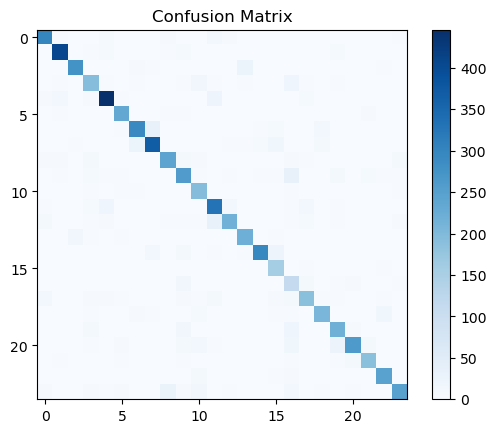

In [5]:
# Confusion Matrix
y_pred = classifier.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = test_set.classes
y_true = testing_labels

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       331
         1.0       0.93      0.94      0.93       432
         2.0       0.93      0.89      0.91       310
         3.0       0.77      0.78      0.78       245
         4.0       0.90      0.90      0.90       498
         5.0       0.88      0.95      0.91       247
         6.0       0.87      0.84      0.85       348
         7.0       0.88      0.85      0.86       436
         8.0       0.86      0.84      0.85       288
        10.0       0.77      0.78      0.78       331
        11.0       0.74      0.93      0.83       209
        12.0       0.80      0.84      0.82       394
        13.0       0.90      0.75      0.81       291
        14.0       0.87      0.90      0.88       246
        15.0       0.96      0.86      0.90       347
        16.0       0.72      0.96      0.82       164
        17.0       0.47      0.78      0.59       144
    

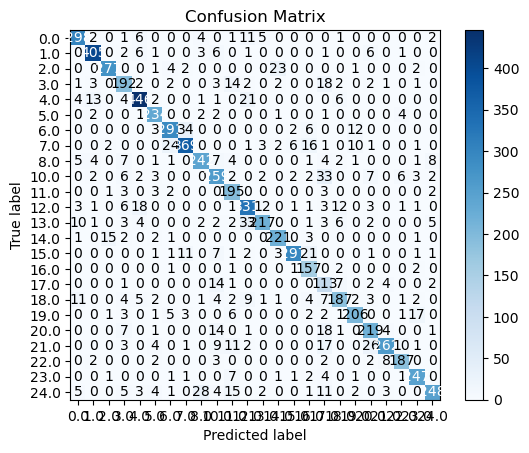

In [6]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Create confusion matrix
class_names = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred_classes, labels=class_names)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Display the values on each tile
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [7]:
import json

with open('classifier_CNN_MNIST_adam_epoch50_2.json', 'r') as f:
    classifier = json.load(f)


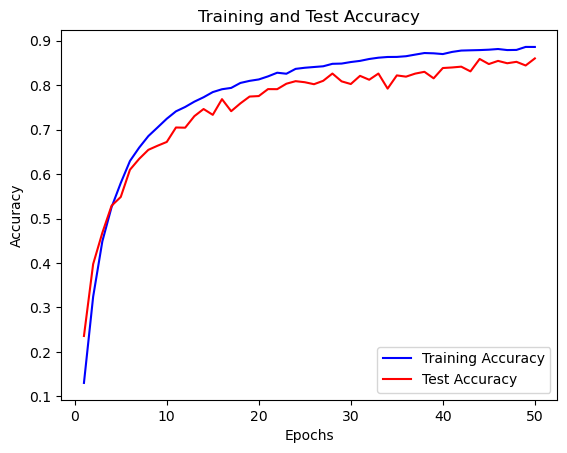

In [8]:

# Train accuracy vs test accuracy
# train_accuracy = classifier.history['accuracy']
# test_accuracy = classifier.history['val_accuracy']
train_accuracy = classifier['accuracy']
test_accuracy = classifier['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


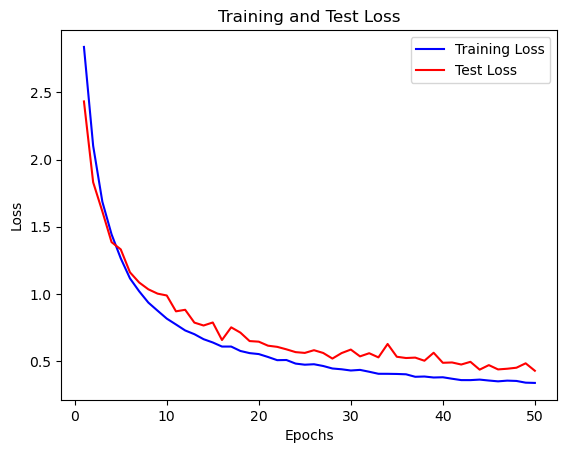

In [9]:
# Model Loss per epoch
train_loss = classifier['loss']
test_loss = classifier['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Classification Report:


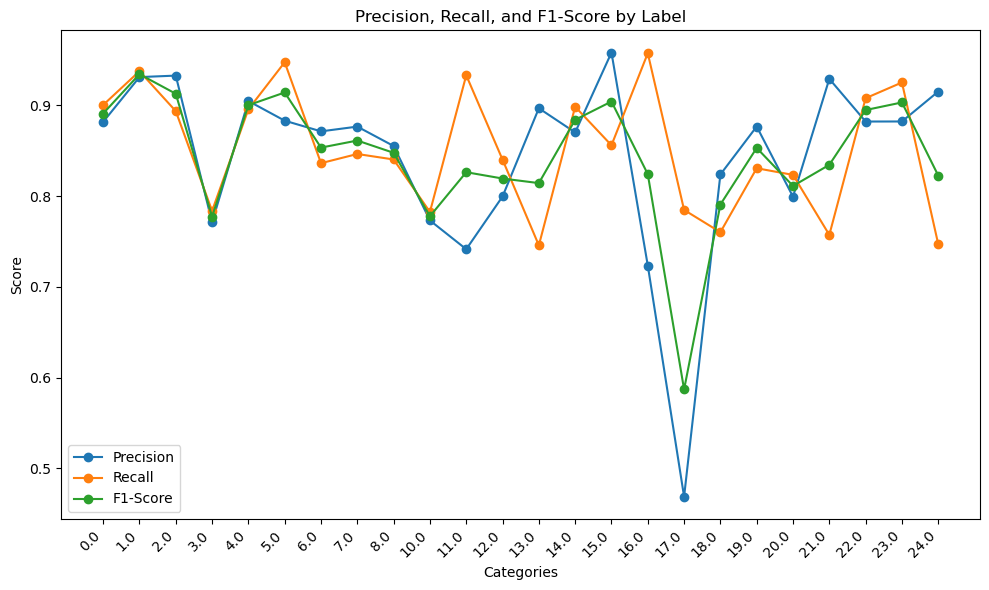

In [10]:
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract values for plotting
categories = list(report.keys())[:-3]
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]

# Create linear graph
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(categories, precision, marker='o', label='Precision')
ax.plot(categories, recall, marker='o', label='Recall')
ax.plot(categories, f1_score, marker='o', label='F1-Score')

ax.set_xlabel('Categories')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Label')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Classification Report:


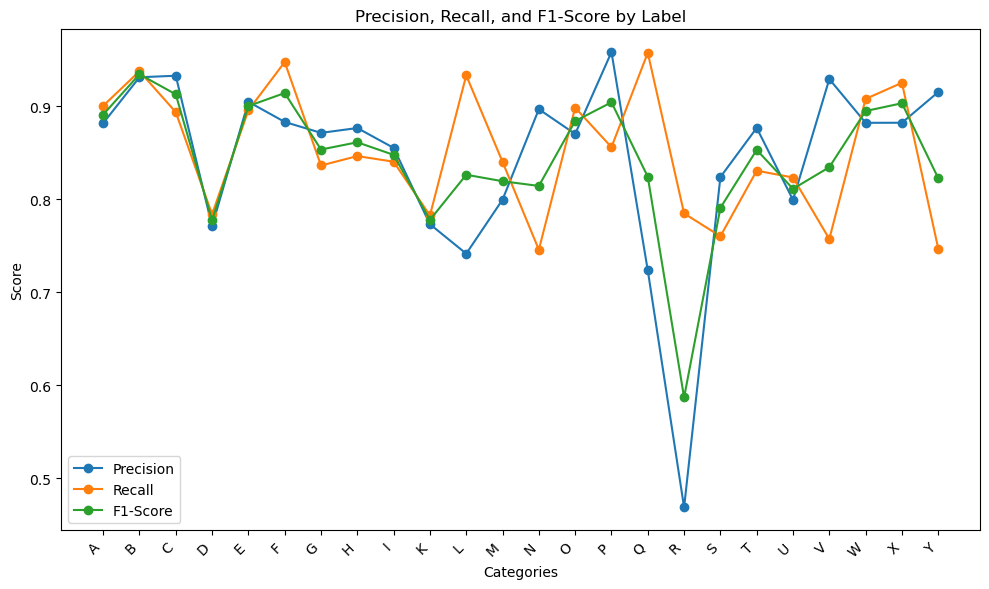

In [11]:
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract values for plotting
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]


# Convert numerical categories to letters using alphabet_dict
categories_labels = [alphabet_dict[float(category)] for category in categories]

# Create linear graph
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(categories_labels, precision, marker='o', label='Precision')
ax.plot(categories_labels, recall, marker='o', label='Recall')
ax.plot(categories_labels, f1_score, marker='o', label='F1-Score')

ax.set_xlabel('Categories')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Label')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()